<a href="https://colab.research.google.com/github/semerriam/points-unknown/blob/main/projects/pj-turbulence/data/co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CO2 in Atmosphere

----

Testing Mapping

In [ ]:
!pip install jsonschema==3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
import altair as alt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rasterio
import rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import json
from random import randrange

----

Importing nc file

In [ ]:
#from netCDF4 import Dataset  # use scipy instead
from scipy.io import netcdf #### <--- This is the library to import.

In [ ]:
import xarray as xr

In [ ]:
file_name = '2019_mean.nc' 
# file_name = 'carbon_dioxide_2020.nc' 

In [ ]:
nc = netcdf.netcdf_file(file_name,'r')

In [ ]:
#Look at the variables available
nc.variables

OrderedDict([('longitude',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e2d0>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x7efcba05c1d0>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x7efcba05ea90>),
             ('decimal_time',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e890>),
             ('time_components',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e4d0>),
             ('bio_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05ef10>),
             ('ocn_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05ec90>),
             ('fossil_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba060350>),
             ('fire_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba060210>)])

In [ ]:
#Look at the dimensions
nc.dimensions

OrderedDict([('longitude', 360),
             ('latitude', 180),
             ('time', None),
             ('time_components', 6)])

In [ ]:
# #Look at a specific variable's dimensions
# nc.variables['T2'].dimensions   ## output is ('Time', 'south_north', 'west_east')

In [ ]:
# #Look at a specific variable's units
# nc.variables['T2'].units        ## output is ('K')

In [ ]:
print(nc)

In [ ]:
import netCDF4
import numpy as np

In [ ]:
f = netCDF4.Dataset('2019_mean.nc')


In [ ]:
f = netCDF4.Dataset(file_name)

In [ ]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    averaging_period_start_time: 2019/01/01 00:00:00 UTC
    averaging_period_end_time: 2019/01/01 03:00:00 UTC
    averaging_period_length_hours: 744
    email: carbontracker.team@noaa.gov
    url: http://carbontracker.noaa.gov
    institution: NOAA Earth System Research Laboratory
    Conventions: CF-1.5
    history: Created 2022-01-22 06:32:15 UTC by ./NRT_v2022-1.eaf.ml137.x. - processed Fri Jun 17 16:53:55 2022 by script with Time-stamp: <tfe07:/home/Andy.Jacobson/co2/andy/tools/R/make_monthly_flux1x1_nc.r: 16 Nov 2017 (Thu) 17:52:12 UTC>
    version: CT-NRT.v2022-1
    dimensions(sizes): longitude(360), latitude(180), time(1), time_components(6)
    variables(dimensions): float64 longitude(longitude), float64 latitude(latitude), float64 time(time), float64 decimal_time(time), int32 time_components(time, time_components), float64 bio_flux_opt(time, latitude, longitude), float64 ocn_flu

In [ ]:
print(f.variables.keys()) # get all variable names

dict_keys(['longitude', 'latitude', 'time', 'decimal_time', 'time_components', 'bio_flux_opt', 'ocn_flux_opt', 'fossil_flux_imp', 'fire_flux_imp'])


Documentation: https://gml.noaa.gov/ccgg/carbontracker/CT2019B_doc.php#tth_sEc3

'longitude' <br>
'latitude' <br>
'time' <br>
'decimal_time' <br>
'time_components' <br>
'bio_flux_opt' : terrestrial biosphere CO2 flux<br>
'ocn_flux_opt' : Ocean CO2 flux<br>
'fossil_flux_imp' : fossil fuel CO2 flux <br>
'fire_flux_imp' : fire emissions CO2 flux

In [ ]:
!pip install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cdsapi
import netCDF4
from netCDF4 import num2date
import numpy as np
import os
import pandas as pd

In [ ]:
cols = list(nc.variables.keys())

In [ ]:
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time'][:]
time_comp = nc.variables['time_components'][:]
decimal_time = nc.variables['decimal_time'][:]
bio_flux_opt = nc.variables['bio_flux_opt'][:]
ocn_flux_opt = nc.variables['ocn_flux_opt'][:]
fossil_flux_imp = nc.variables['fossil_flux_imp'][:]
fire_flux_imp = nc.variables['fire_flux_imp'][:]

Attempt at exporting as csv

In [ ]:
# list_nc = []
# for c in cols:
#     list_nc.append(list(nc.variables[c][:]))

In [ ]:
# df_nc = pd.DataFrame(list_nc)
# df_nc = df_nc.T
# df_nc.columns = cols

In [ ]:
# df_nc.shape()

In [ ]:
# df_nc.describe()

In [ ]:
# df_nc.to_csv("2019_mean_a.csv", index = False)

Mapping using Basecamp

In [ ]:
#Look at the variables available
nc.variables

OrderedDict([('longitude',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e2d0>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x7efcba05c1d0>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x7efcba05ea90>),
             ('decimal_time',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e890>),
             ('time_components',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05e4d0>),
             ('bio_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05ef10>),
             ('ocn_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba05ec90>),
             ('fossil_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba060350>),
             ('fire_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7efcba060210>)])

In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [ ]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [ ]:
# lat = nc.variables['latitude'][:]
# lon = nc.variables['longitude'][:]
# time = nc.variables['time'][:]
# time_comp = nc.variables['time_components'][:]
# decimal_time = nc.variables['decimal_time'][:]
# bio_flux_opt = nc.variables['bio_flux_opt'][:]
# ocn_flux_opt = nc.variables['ocn_flux_opt'][:]
# fossil_flux_imp = nc.variables['fossil_flux_imp'][:]
# fire_flux_imp = nc.variables['fire_flux_imp'][:]

In [ ]:
bio_flux_opt_units = nc.variables['bio_flux_opt'].units
ocn_flux_opt_units = nc.variables['ocn_flux_opt'].units
fossil_flux_imp_units = nc.variables['fossil_flux_imp'].units
fire_flux_imp_units = nc.variables['fire_flux_imp'].units

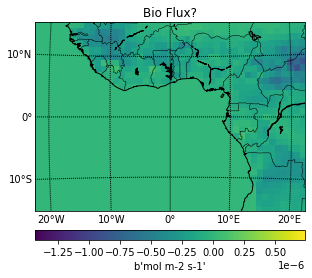

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(bio_flux_opt))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(bio_flux_opt_units)

# Add Title
plt.title('Bio Flux?')

plt.show()

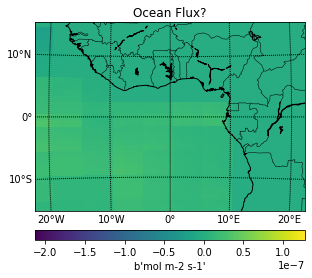

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ocn_flux_opt))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(ocn_flux_opt_units)

# Add Title
plt.title('Ocean Flux?')

plt.show()

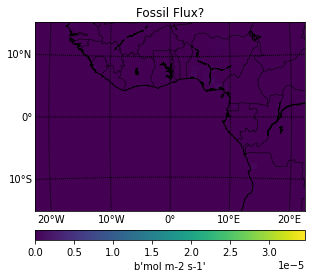

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(fossil_flux_imp))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(fossil_flux_imp_units)

# Add Title
plt.title('Fossil Flux?')

plt.show()

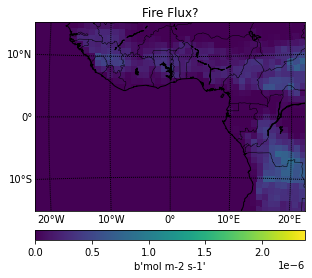

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(fire_flux_imp))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(fire_flux_imp_units)

# Add Title
plt.title('Fire Flux?')

plt.show()

In [ ]:
# plt.rcParams['figure.figsize'] = (12.0, 8.0)

# # These lines do the actual plotting
# plt.contourf(n, 20)
# plt.show()

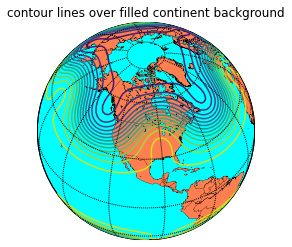

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()